In [90]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
import json

In [91]:
img_num = 3
image_filenames = ['test5s.jpg',
                   'test8s.jpg',
                   'test10s.jpg',
                   'test5s0B.jpg',
                   'test8s0B.jpg',
                   'test10s0B.jpg',
                   'test5s0B1C.jpg',
                   'test5s0B2C.jpg',
                   ]
image_filepath = Path('/', 'mnt', 'data', 'data', image_filenames[img_num])
ROI_manifest = Path('/', 'home', 'phorest', 'Documents', 'Python', 'phorest_pipeline', 'generated_files', 'ROI_manifest.json')
print(image_filepath)

/mnt/data/data/test5s0B.jpg


In [92]:
roi_data = ROI_manifest.read_text(encoding="utf-8")
roi_data = json.loads(roi_data)
rois = list(roi_data.keys())
print(len(rois))

21


In [93]:
img = Image.open(image_filepath)
img_np = np.array(img)
print(img.size)
print(img_np.shape)

(9152, 6944)
(6944, 9152, 3)


slice(6849, 7203, None)
slice(523, 668, None)
(145, 354, 3)


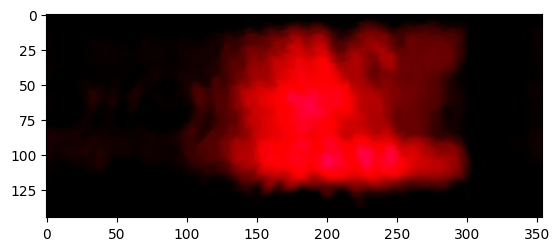

In [110]:
roi_num = 18
offset_x = -160
offset_y = 20

roi_x_slice = slice(roi_data[rois[roi_num]]['coords'][1] + offset_x, roi_data[rois[roi_num]]['coords'][1]  + offset_x + roi_data[rois[roi_num]]['size'][1])
roi_y_slice = slice(roi_data[rois[roi_num]]['coords'][0] + offset_y, roi_data[rois[roi_num]]['coords'][0] + offset_y + roi_data[rois[roi_num]]['size'][0])
print(roi_x_slice)
print(roi_y_slice)
roi_img = img_np[roi_y_slice, roi_x_slice]
print(roi_img.shape)
plt.imshow(roi_img)

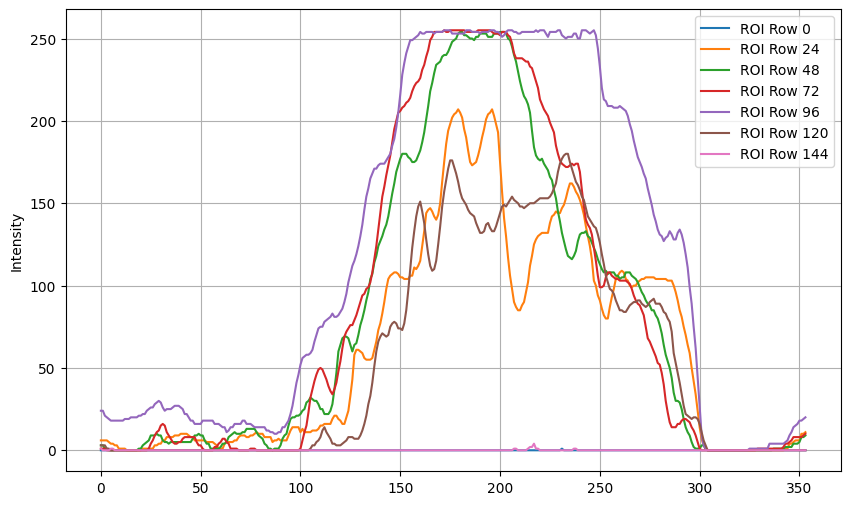

Max/Min of row 0: 2/0


In [111]:
num_rows, num_cols, _ = roi_img.shape
    

plt.figure(figsize=(10, 6))

for row_index in range(0, num_rows, 24):
    row_intensities = roi_img[row_index, :, 0]
    plt.plot(row_intensities, label=f'ROI Row {row_index}')

plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()
print(f"Max/Min of row 0: {np.amax(roi_img[0, :])}/{np.amin(roi_img[0, :])}")